In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1684622561339_0007,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

In [3]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/31/25/5abcd82372d3d4a3932e1fa8c3dbf9efac10cc7c0d16e78467460571b404/typing_extensions-4.5.0-py3-none-any.whl

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
df = spark.read.csv('s3://financeresults/results.csv', header='true', inferSchema = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
df_pandas = df.toPandas()
df_pandas['Date'] = pd.to_datetime(df_pandas['Date']).dt.date
df_pandas['Avg_Volatility'] = pd.to_numeric(df_pandas['Avg_Volatility'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# 1. Average Volatility Trend per Company 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

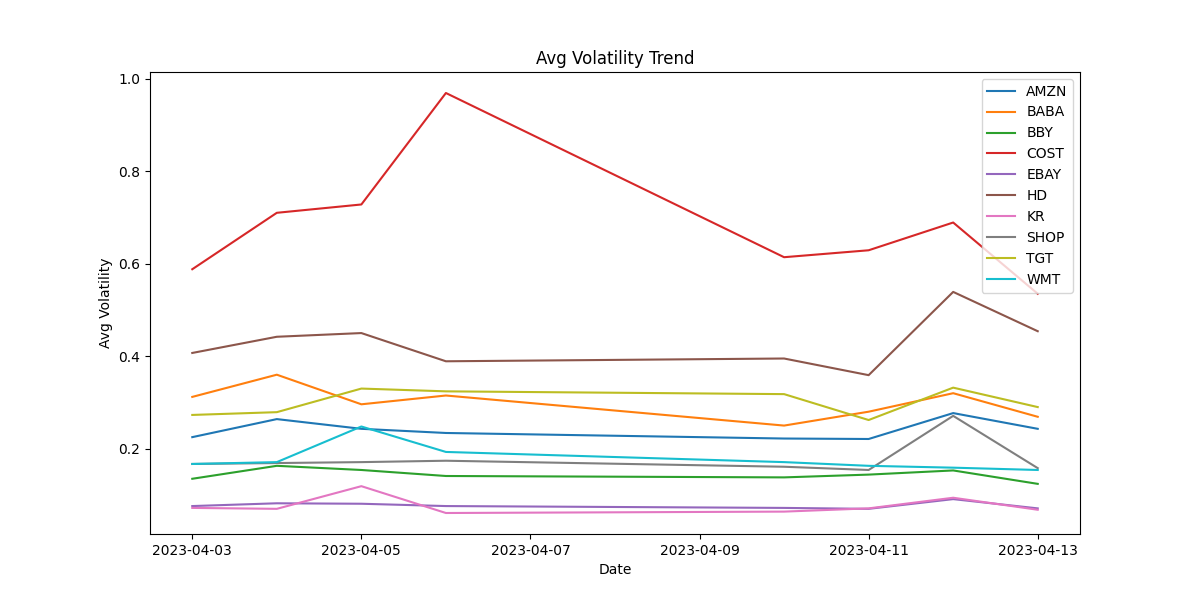

In [27]:
df1 = df_pandas.pivot(index='Date', columns='Company', values='Avg_Volatility')

df1.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Avg Volatility")
plt.title("Avg Volatility Trend")
plt.legend(loc = "upper right")
%matplot plt

### Based on the graph of average volatility trend per company, it can be observed that Costco exhibits the highest volatility compared to other companies.

# 2. Daily Highest Volatility per Company 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

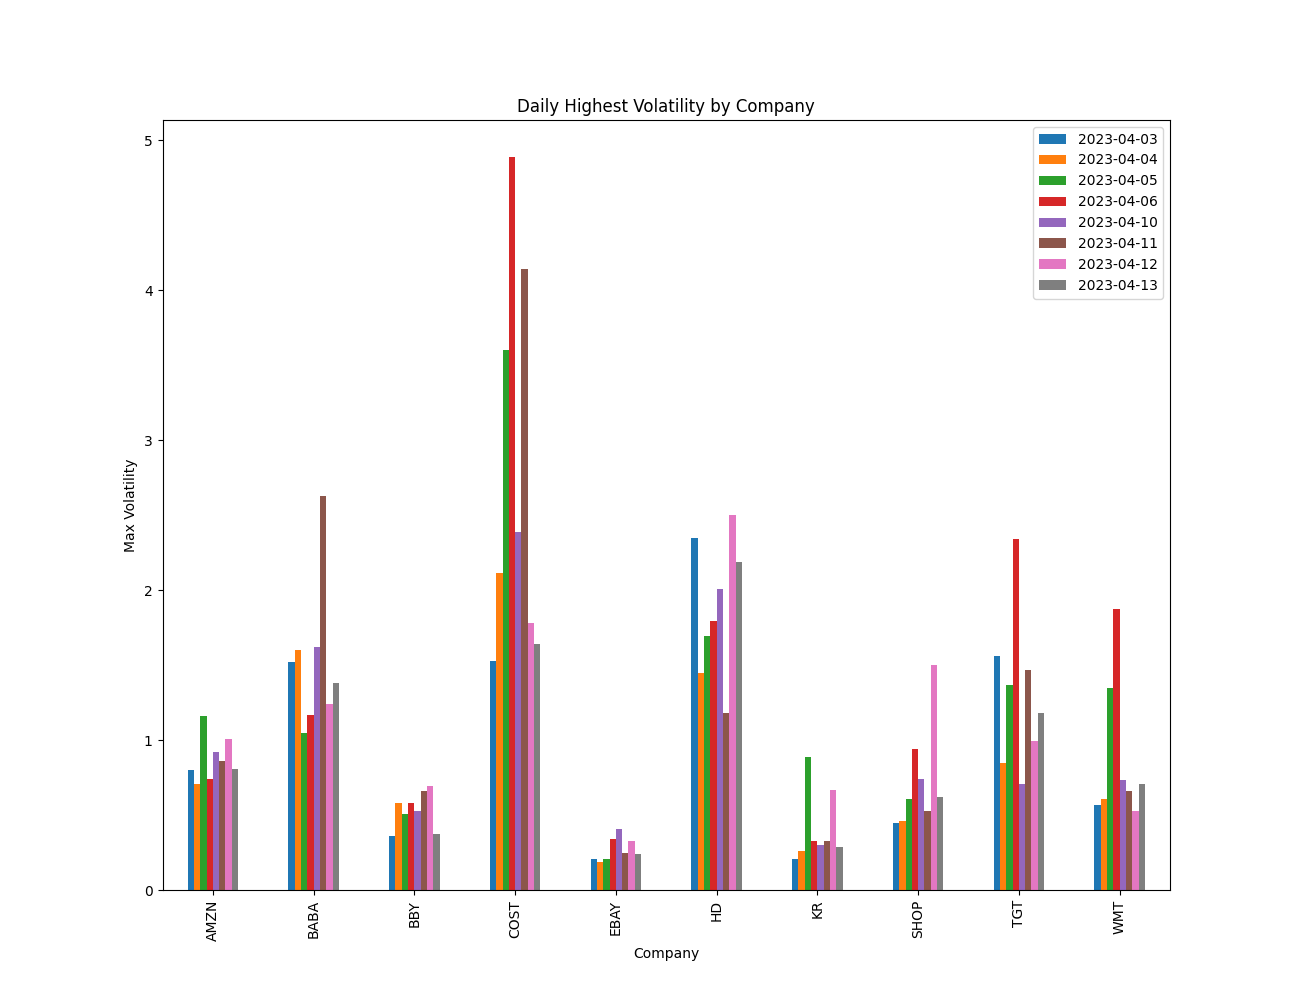

In [39]:
df_pandas.pivot(index='Company', columns='Date', values='Max_volatility').plot(kind ='bar', figsize=(13, 10))
plt.ylabel("Max Volatility")
plt.title("Daily Highest Volatility by Company")
plt.legend(loc = "upper right")
%matplot plt

### The graph displaying the daily highest volatility per company confirms the earlier conclusion. Costco stands out prominently with significantly higher bars representing its daily highest volatility compared to other companies.

# Appendix

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

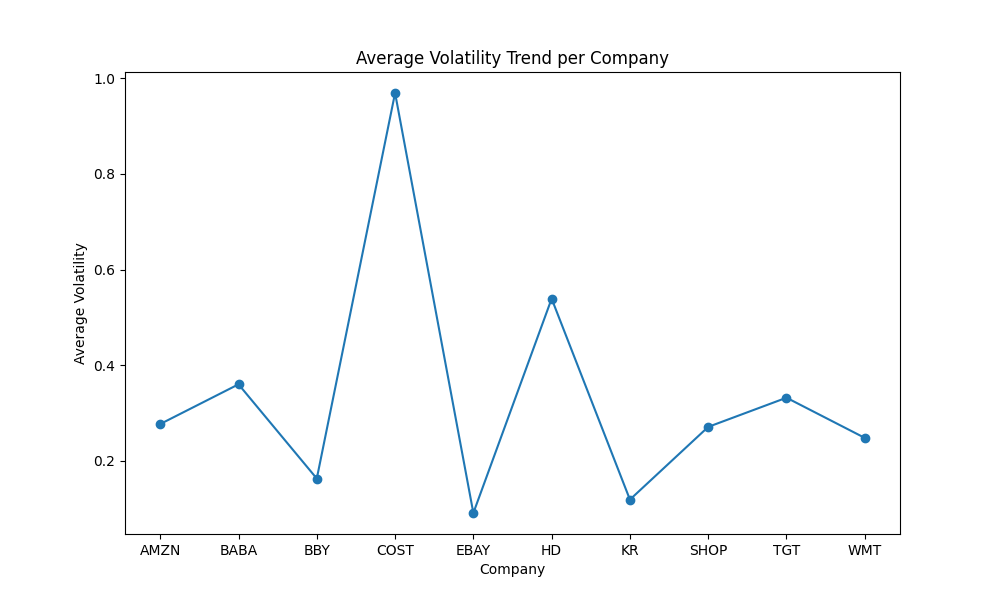

In [37]:
grouped_df = df_pandas.groupby('Company')['Avg_Volatility'].max().reset_index()

sorted_df = grouped_df.sort_values('Company')

plt.figure(figsize=(10, 6))
plt.plot(sorted_df['Company'], sorted_df['Avg_Volatility'], marker='o')


plt.xlabel('Company')
plt.ylabel('Average Volatility')
plt.title('Average Volatility Trend per Company')

%matplot plt

In [ ]:
##Thank you!